# 1 Load libraries and data

In [1]:
#Libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 
import pylab
from scipy import stats
from scipy.stats import kurtosis, skew
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Settings
%matplotlib inline
pd.options.display.max_rows = 60
pd.options.display.max_columns = 30
pd.set_option('display.precision', 4)

In [263]:
#load data
data = pd.read_excel('..\\data\\LeadData_Customer_Modified.xlsx', index_col='OriginalCustomerNumber')

#Verify data types
#data.dtypes

#Convert data to float for calculations
data = data.astype(float)

#Verify data size
data.shape

(4026, 112)

# 2 Correlation Matrix

In [ ]:
#Print data profile
data_profile = pp.ProfileReport(data)
display(data_profile)

In [88]:
# #Compute the correlation matrix
corr_matrix = round(data.corr(),2)
# display(corr_matrix)

def get_sorted_corr(df):
    crr = df.corr().abs().unstack()
# #     labels_to_drop = get_redundant_pairs(df)
# #     crr = crr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return crr

# def get_redundant_pairs(df):
#     pairs_to_drop = set()
#     cols = df.columns
# #     for i in range(0, df.shape[1]):
# #         for j in range(0, i+1):
# #             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# #Unstack and print to excel
get_sorted_corr(data)
sorted_corr = get_sorted_corr(data)
sorted_corr.to_csv('..\\data\\Output\\Sorted_Correlation.csv')

C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [ ]:
# # # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# # # Set up the matplotlib figure
# fig, ax = plt.subplots(figsize=(4,4))

# # # Generate a custom diverging colormap
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# heatmap = sns.heatmap(corr_matrix, mask=mask, cmap=cmap,
#                       square=True, linewidths=3,
#                       cbar_kws = {'shrink': 1},
#                       vmin=-1, vmax=1,
#                       annot=True, annot_kws = {'size': 1})

# # add the column names as labels
# ax.set_yticklabels(corr_matrix.columns)
# ax.set_xticklabels(corr_matrix.columns)

# plt.show()
# # plt.savefig('..\\data\\Output\\ScatterPlot')

# 3 Parts and Services

Expenditure_12M_PartsNServices = OLGAAmount * OLGAParts% * PartsDCAL + OLGAAmount * OLGAService% * ServiceDCAL
Assumptions: Count_CatFleetSize > 0, Expenditure_12M_PartsNServices > 0, PartsDcal>10

## Selecting data

In [160]:
#Filtering data columns to use
data_filtered = data.drop(columns=[#'LoneStar'                                 
                                     'Family_Accounts'
                                     ,'LN_Family_Accounts'
                                    ,'AverageDaysToPay'
                                    ,'LN_AverageDaysToPay'
                                    ,'Expenditure_12M_Equipment'
                                    ,'LN_Expenditure_12M_Equipment'
#                                      ,'Expenditure_12M_PartsNServices'
#                                    ,'LN_Expenditure_12M_PartsNServices'
                                    ,'Expenditure_12M_Rentals'
                                    ,'LN_Expenditure_12M_Rentals'
                                    ,'Family_Expenditure_12M_Equipment'
                                    ,'LN_Family_Expenditure_12M_Equipment'
                                    ,'Family_Expenditure_12M_PartsNServices'
                                    ,'LN_Family_Expenditure_12M_PartsNServices'
                                    ,'Family_Expenditure_12M_Rentals'
                                    ,'LN_Family_Expenditure_12M_Rentals'
                                    ,'Family_CatFleetSize'
                                    ,'LN_Family_CatFleetSize'
                                    ,'Family_FleetSize'
                                    ,'LN_Family_FleetSize'
#                                       ,'Count_CatFleetSize'
                                      ,'LN_Count_CatFleetSize'
                                     ,'Count_CatFleetSize_BINS_0'
                                     ,'Count_CatFleetSize_BINS_1'
                                    ,'Count_CatFleetSize_BINS_2_5'
                                    ,'Count_CatFleetSize_BINS_6_10'
                                    ,'Count_CatFleetSize_BINS_11_15'
                                    ,'Count_CatFleetSize_BINS_16_20'
                                    ,'Count_CatFleetSize_BINS_21-25'
                                    ,'Count_CatFleetSize_BINS_26_PLUS'
                                    ,'Count_FleetSize'
                                    ,'LN_Count_FleetSize'
                                    ,'Percentage_PLSubscriptionActive'
                                    ,'LN_Percentage_PLSubscriptionActive'
                                    ,'Percentage_Cat'
                                    ,'LN_Percentage_Cat'
                                    ,'PercentageFleetUtilized'
                                    ,'LN_PercentageFleetUtilized'
                                    ,'Avg_AnnualUsage'
                                    ,'LN_Avg_AnnualUsage'
#                                      ,'OLGAAmount'
#                                     ,'LN_OLGAAmount'
#                                      ,'PartsDCAL'
                                     ,'LN_PartsDCAL'
                                     ,'PartsDCAL_BINS_0'
                                   ,'PartsDCAL_BINS_0_10'
                                   ,'PartsDCAL_BINS_10_35'
                                   ,'PartsDCAL_BINS_35_70'
                                   ,'PartsDCAL_BINS_70_90'
                                   ,'PartsDCAL_BINS_90_100'
                                   ,'PartsDCAL_BINS_100'
#                                      ,'ServiceDCAL'
                                     ,'LN_ServiceDCAL'
                                   ,'ServiceDCAL_BINS_0'
                                   ,'ServiceDCAL_BINS_0_10'
                                   ,'ServiceDCAL_BINS_10_35'
                                   ,'ServiceDCAL_BINS_35_70'
                                   ,'ServiceDCAL_BINS_70_90'
                                   ,'ServiceDCAL_BINS_90_100'
                                    ,'ServiceDCAL_BINS_100'
                                    ,'Average_Fleet_Age_Months'
                                    ,'LN_Average_Fleet_Age_Months'
                                    ,'Average_Fleet_Hours'
                                    ,'LN_Average_Fleet_Hours'
                                    ,'PARTS_CU_0_12M'
                                    ,'LN_PARTS_CU_0_12M'
                                    ,'PARTS_Total_Per_CatFleetSize'
                                    ,'LN_PARTS_Total_Per_CatFleetSize'
                                    ,'PARTS_Total_Per_500HR_Utilized'
                                    ,'LN_PARTS_Total_Per_500HR_Utilized'
                                    ,'PARTS_COUNT_CU_0_12M'
                                    ,'PARTS_Count_Per_CatFleetSize'
                                    ,'LN_PARTS_Count_Per_CatFleetSize'
                                    ,'PARTS_Count_Per_500HR_Utilized'
                                    ,'LN_PARTS_Count_Per_500HR_Utilized'
                                    ,'PartsReturnPercentage_CU'
                                    ,'PartsReturnPercentage_BINS_0'
                                    ,'PartsReturnPercentage_BINS_0_10'
                                    ,'PartsReturnPercentage_BINS_10_35'
                                    ,'PartsReturnPercentage_BINS_35_70'
                                    ,'PartsReturnPercentage_BINS_70_90'
                                    ,'PartsReturnPercentage_BINS_90_100'
                                    ,'PartsReturnPercentage_BINS_100'
                                    ,'SERVICES_CU_0_12M'
                                    ,'LN_SERVICES_CU_0_12M'
                                    ,'SERVICES_Total_Per_CatFleetSize'
                                    ,'LN_SERVICES_Total_Per_CatFleetSize'
                                    ,'SERVICES_Total_Per_500HR_Utilized'
                                    ,'LN_SERVICES_Total_Per_500HR_Utilized'
                                    ,'SERVICES_COUNT_CU_0_12M'
                                    ,'LN_SERVICES_COUNT_CU_0_12M'
                                    ,'SERVICES_Count_Per_CatFleetSize'
                                    ,'LN_SERVICES_Count_Per_CatFleetSize'
                                    ,'SERVICES_Count_Per_500HR_Utilized'
                                    ,'LN_SERVICES_Count_Per_500HR_Utilized'
                                    ,'ServicesBackOutPercentage_CU'
                                    ,'ServiceBackOutPercentage_BINS_0'
                                    ,'ServiceBackOutPercentage_BINS_0_10'
                                    ,'ServiceBackOutPercentage_BINS_10_35'
                                    ,'ServiceBackOutPercentage_BINS_35_70'
                                    ,'ServiceBackOutPercentage_BINS_70_90'
                                    ,'ServiceBackOutPercentage_BINS_90_100'
                                    ,'ServiceBackOutPercentage_BINS_100'
                                    ,'SOS_COUNT_CU_0_12M'
                                    ,'LN_SOS_COUNT_CU_0_12M'
                                    ,'SOS_Count_Per_CatFleetSize'
                                    ,'LN_SOS_Count_Per_CatFleetSize'
                                    ,'SOS_Count_Per_500HR_Utilized'
                                    ,'LN_SOS_Count_Per_500HR_Utilized'
                                  ])
data_filtered.columns

Index(['LoneStar', 'Expenditure_12M_PartsNServices',
       'LN_Expenditure_12M_PartsNServices', 'Count_CatFleetSize', 'OLGAAmount',
       'LN_OLGAAmount', 'PartsDCAL', 'ServiceDCAL'],
      dtype='object')

## Histogram

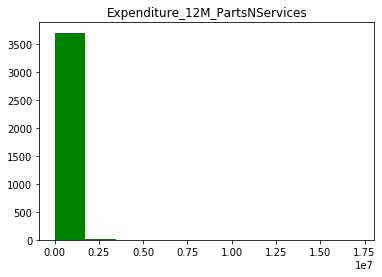

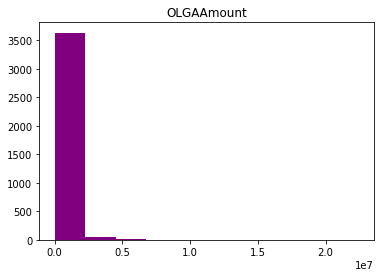

In [161]:
test = data_filtered
test = test.dropna()
X = test[['OLGAAmount']]
Y = test[['Expenditure_12M_PartsNServices']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

In [162]:
test = data_filtered
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 1M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 500K Spending
test.shape

(3910, 8)

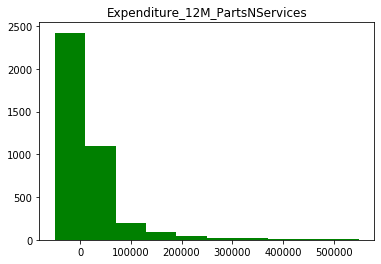

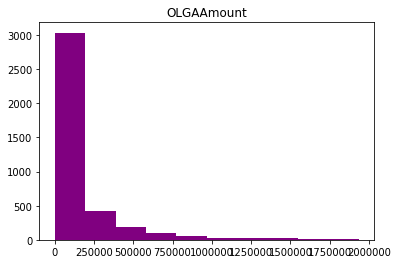

In [163]:
X = test[['OLGAAmount']]
Y = test[['Expenditure_12M_PartsNServices']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

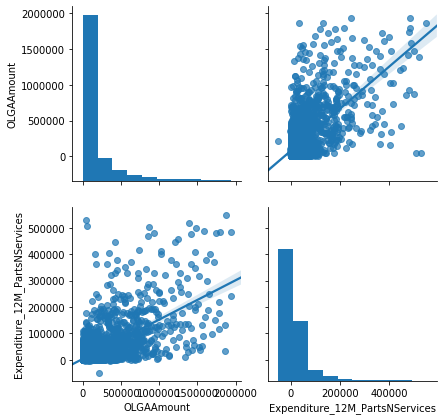

In [164]:
test = data_filtered
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 1M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 500K Spending
tpl = test[['OLGAAmount','Expenditure_12M_PartsNServices']]
#Scatter plot
sns.pairplot(tpl, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


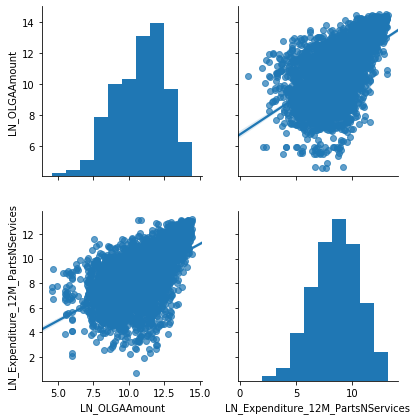

In [165]:
test = data_filtered
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 1M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 500K Spending
tpl = test[['LN_OLGAAmount','LN_Expenditure_12M_PartsNServices']]
#Scatter plot
sns.pairplot(tpl, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})

## OLGA 1. OLGA < 2,000,000, Expenditure_12M_PartsNServices < 600,000

In [166]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize <= 0]) # drop customers with 0 machines
test = test.drop(test.index[test.Expenditure_12M_PartsNServices <= 0]) # drop customers with 0 or less $
test = test.drop(test.index[test.PartsDCAL <= 0 ])   #Drop customers with POPS less than 10
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 1M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 500K Spending
test = test.dropna()
X = test[['LN_OLGAAmount']]
Y = test[['LN_Expenditure_12M_PartsNServices']]
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     LN_Expenditure_12M_PartsNServices   R-squared (uncentered):                   0.961
Model:                                           OLS   Adj. R-squared (uncentered):              0.961
Method:                                Least Squares   F-statistic:                          8.886e+04
Date:                               Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                                       09:03:25   Log-Likelihood:                         -7085.7
No. Observations:                               3591   AIC:                                  1.417e+04
Df Residuals:                                   3590   BIC:                                  1.418e+04
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [167]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 2.935871657038878
MAE 1.355838364377259
RMSE 1.7134385477859655


In [168]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.29


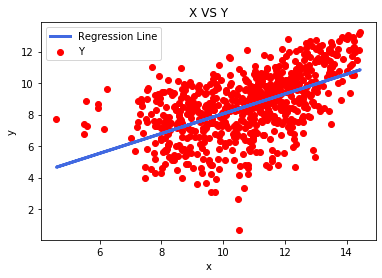

In [169]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

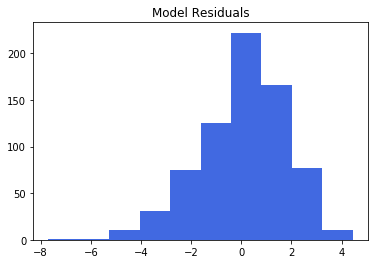

In [170]:
# Grab the residuals & then call the hist() method
resd = y_test - y_predict
resd.hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

## OLGA 2. POPS = 100

In [202]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize <= 0]) # drop customers with 0 machines
test = test.drop(test.index[test.Expenditure_12M_PartsNServices <= 0]) # drop customers with 0 or less $
test = test.drop(test.index[test.PartsDCAL == 0 ])   #Drop customers with 0 POPS
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 2M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 600K Spending
test = test.drop(test.index[test.PartsDCAL < 100 ]) #Drop customer with less than 100 POPS
test = test.dropna()
X = test[['LN_OLGAAmount']]
Y = test[['LN_Expenditure_12M_PartsNServices']]
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     LN_Expenditure_12M_PartsNServices   R-squared (uncentered):                   0.969
Model:                                           OLS   Adj. R-squared (uncentered):              0.969
Method:                                Least Squares   F-statistic:                          1.612e+04
Date:                               Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                                       09:09:02   Log-Likelihood:                         -969.27
No. Observations:                                510   AIC:                                      1941.
Df Residuals:                                    509   BIC:                                      1945.
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [203]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 2.2565403217071944
MAE 1.2498123592797088
RMSE 1.5021785252449837


In [204]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))
#note: R2 increased from 0.42 to 0.51

R2: 0.29


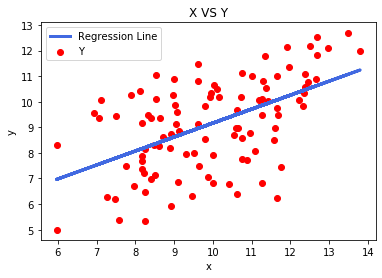

In [205]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

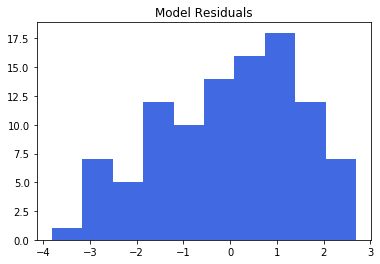

In [206]:
# Grab the residuals & then call the hist() method
resd = y_test - y_predict
resd.hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

## OLGA 3. 70 <POPS < 100 (i tried 90-100 but sample is too small)

In [213]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize <= 0]) # drop customers with 0 machines
test = test.drop(test.index[test.Expenditure_12M_PartsNServices <= 0]) # drop customers with 0 or less $
test = test.drop(test.index[test.PartsDCAL == 0 ])   #Drop customers with 0 POPS
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 2M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 600K Spending
test = test.drop(test.index[test.PartsDCAL < 70 ]) #Drop customer with less than 100 POPS
test = test.drop(test.index[test.PartsDCAL == 100 ]) #Drop customer with less than 100 POPS
test = test.dropna()
X = test[['LN_OLGAAmount']]
Y = test[['LN_Expenditure_12M_PartsNServices']]
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     LN_Expenditure_12M_PartsNServices   R-squared (uncentered):                   0.981
Model:                                           OLS   Adj. R-squared (uncentered):              0.981
Method:                                Least Squares   F-statistic:                              9995.
Date:                               Mon, 11 May 2020   Prob (F-statistic):                   8.87e-171
Time:                                       09:10:13   Log-Likelihood:                         -336.78
No. Observations:                                198   AIC:                                      675.6
Df Residuals:                                    197   BIC:                                      678.9
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [214]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 1.7934447718378308
MAE 1.0562920532907114
RMSE 1.3391955689285382


In [215]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.45


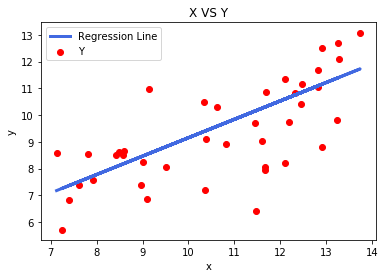

In [216]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

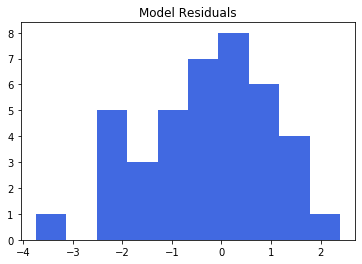

In [217]:
# Grab the residuals & then call the hist() method
resd = y_test - y_predict
resd.hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

## OLGA 4. 35 < POPS < 70

In [218]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize <= 0]) # drop customers with 0 machines
test = test.drop(test.index[test.Expenditure_12M_PartsNServices <= 0]) # drop customers with 0 or less $
test = test.drop(test.index[test.PartsDCAL == 0 ])   #Drop customers with 0 POPS
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 2M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 600K Spending
test = test.drop(test.index[test.PartsDCAL < 35 ]) #Drop customer with less than 100 POPS
test = test.drop(test.index[test.PartsDCAL >=70 ]) #Drop customer with less than 100 POPS
test = test.dropna()
X = test[['LN_OLGAAmount']]
Y = test[['LN_Expenditure_12M_PartsNServices']]
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     LN_Expenditure_12M_PartsNServices   R-squared (uncentered):                   0.986
Model:                                           OLS   Adj. R-squared (uncentered):              0.986
Method:                                Least Squares   F-statistic:                          4.116e+04
Date:                               Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                                       09:11:15   Log-Likelihood:                         -917.34
No. Observations:                                585   AIC:                                      1837.
Df Residuals:                                    584   BIC:                                      1841.
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [219]:
# estimate the p-values
results.pvalues

LN_OLGAAmount    0.0
dtype: float64

In [220]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 1.0035077461905688
MAE 0.7964706766872703
RMSE 1.0017523377514868


In [221]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.67


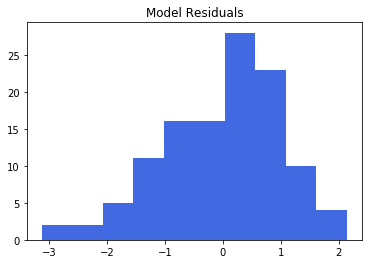

In [222]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

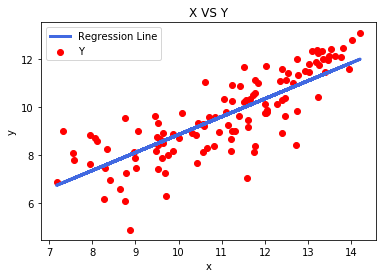

In [223]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## OLGA 5. 10 < POPS < 35

In [224]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize <= 0]) # drop customers with 0 machines
test = test.drop(test.index[test.Expenditure_12M_PartsNServices <= 0]) # drop customers with 0 or less $
test = test.drop(test.index[test.PartsDCAL == 0 ])   #Drop customers with 0 POPS
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 2M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 600K Spending
test = test.drop(test.index[test.PartsDCAL < 10 ]) #Drop customer with less than 100 POPS
test = test.drop(test.index[test.PartsDCAL >=35 ]) #Drop customer with less than 100 POPS
test = test.dropna()
X = test[['LN_OLGAAmount']]
Y = test[['LN_Expenditure_12M_PartsNServices']]
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     LN_Expenditure_12M_PartsNServices   R-squared (uncentered):                   0.982
Model:                                           OLS   Adj. R-squared (uncentered):              0.982
Method:                                Least Squares   F-statistic:                          6.166e+04
Date:                               Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                                       09:12:02   Log-Likelihood:                         -1843.3
No. Observations:                               1128   AIC:                                      3689.
Df Residuals:                                   1127   BIC:                                      3694.
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [225]:
# estimate the p-values
results.pvalues

LN_OLGAAmount    0.0
dtype: float64

In [226]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 1.488045461653627
MAE 0.9400485890367898
RMSE 1.219854688745191


In [227]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.54


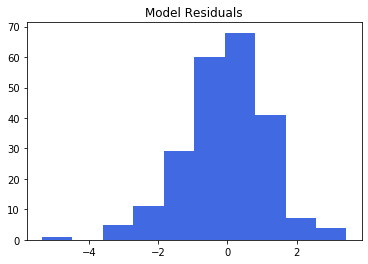

In [228]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

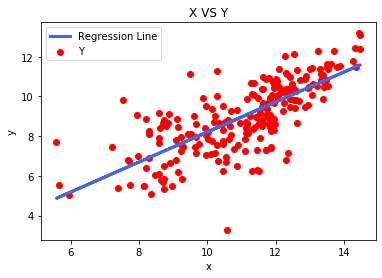

In [229]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## OLGA 6. POPS < 10

In [231]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize <= 0]) # drop customers with 0 machines
test = test.drop(test.index[test.Expenditure_12M_PartsNServices <= 0]) # drop customers with 0 or less $
test = test.drop(test.index[test.PartsDCAL == 0 ])   #Drop customers with 0 POPS
test = test.drop(test.index[test.OLGAAmount >= 2000000]) #Drop customers with over 2M OLGA
test = test.drop(test.index[test.Expenditure_12M_PartsNServices >= 600000]) #Drop customers with over 600K Spending
test = test.drop(test.index[test.PartsDCAL >=10 ]) #Drop customer with less than 100 POPS
test = test.dropna()
X = test[['LN_OLGAAmount']]
Y = test[['LN_Expenditure_12M_PartsNServices']]
# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     LN_Expenditure_12M_PartsNServices   R-squared (uncentered):                   0.955
Model:                                           OLS   Adj. R-squared (uncentered):              0.955
Method:                                Least Squares   F-statistic:                          2.485e+04
Date:                               Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                                       09:13:35   Log-Likelihood:                         -2200.0
No. Observations:                               1170   AIC:                                      4402.
Df Residuals:                                   1169   BIC:                                      4407.
Df Model:                                          1                                                  
Covariance Type:                           nonrobust                     

In [232]:
# estimate the p-values
results.pvalues

LN_OLGAAmount    0.0
dtype: float64

In [233]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 2.767005059992714
MAE 1.3125142996674048
RMSE 1.6634317118513504


In [234]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.24


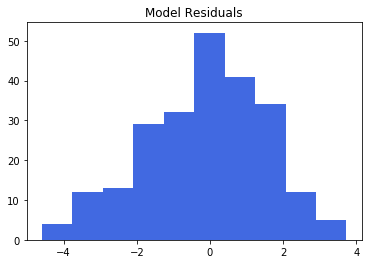

In [235]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

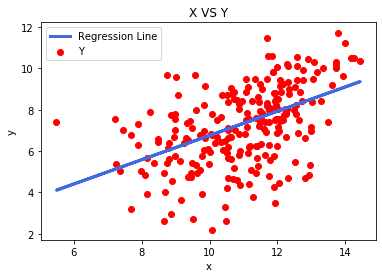

In [236]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 4 Equipment

Expenditure_12M_Equipment = Purchase_due_to_Utilization + Purchase_due_to_age
Assumptions: Count_CatFleetSize > 0, Expenditure_12M_Equipment > 0

## Selecting data

In [289]:
#Filtering data columns to use
data_filtered = data.drop(columns=['LoneStar'                                 
                                     ,'Family_Accounts'
                                     ,'LN_Family_Accounts'
                                    ,'AverageDaysToPay'
                                    ,'LN_AverageDaysToPay'
                                    ,'Expenditure_12M_Equipment'
                                    ,'LN_Expenditure_12M_Equipment'
                                     ,'Expenditure_12M_PartsNServices'
                                   ,'LN_Expenditure_12M_PartsNServices'
                                    ,'Expenditure_12M_Rentals'
                                    ,'LN_Expenditure_12M_Rentals'
                                    ,'Expenditure_EQ_RN'
#                                     ,'LN_Expenditure_EQ_RN'
                                    ,'Family_Expenditure_12M_Equipment'
                                    ,'LN_Family_Expenditure_12M_Equipment'
                                    ,'Family_Expenditure_12M_PartsNServices'
                                    ,'LN_Family_Expenditure_12M_PartsNServices'
                                    ,'Family_Expenditure_12M_Rentals'
                                    ,'LN_Family_Expenditure_12M_Rentals'
                                    ,'Family_CatFleetSize'
                                    ,'LN_Family_CatFleetSize'
                                    ,'Family_FleetSize'
                                    ,'LN_Family_FleetSize'
#                                       ,'Count_CatFleetSize'
#                                       ,'LN_Count_CatFleetSize'
                                     ,'Count_CatFleetSize_BINS_0'
                                     ,'Count_CatFleetSize_BINS_1'
                                    ,'Count_CatFleetSize_BINS_2_5'
                                    ,'Count_CatFleetSize_BINS_6_10'
                                    ,'Count_CatFleetSize_BINS_11_15'
                                    ,'Count_CatFleetSize_BINS_16_20'
                                    ,'Count_CatFleetSize_BINS_21-25'
                                    ,'Count_CatFleetSize_BINS_26_PLUS'
                                    ,'Count_FleetSize'
                                    ,'LN_Count_FleetSize'
                                    ,'Percentage_PLSubscriptionActive'
                                    ,'LN_Percentage_PLSubscriptionActive'
                                    ,'Percentage_Cat'
                                    ,'LN_Percentage_Cat'
                                    ,'PercentageFleetUtilized'
                                    ,'LN_PercentageFleetUtilized'
                                    ,'Avg_AnnualUsage'
#                                     ,'LN_Avg_AnnualUsage'
                                     ,'OLGAAmount'
                                    ,'LN_OLGAAmount'
                                     ,'PartsDCAL'
                                     ,'LN_PartsDCAL'
                                     ,'PartsDCAL_BINS_0'
                                   ,'PartsDCAL_BINS_0_10'
                                   ,'PartsDCAL_BINS_10_35'
                                   ,'PartsDCAL_BINS_35_70'
                                   ,'PartsDCAL_BINS_70_90'
                                   ,'PartsDCAL_BINS_90_100'
                                   ,'PartsDCAL_BINS_100'
                                     ,'ServiceDCAL'
                                     ,'LN_ServiceDCAL'
                                   ,'ServiceDCAL_BINS_0'
                                   ,'ServiceDCAL_BINS_0_10'
                                   ,'ServiceDCAL_BINS_10_35'
                                   ,'ServiceDCAL_BINS_35_70'
                                   ,'ServiceDCAL_BINS_70_90'
                                   ,'ServiceDCAL_BINS_90_100'
                                    ,'ServiceDCAL_BINS_100'
                                    ,'Average_Fleet_Age_Months'
#                                     ,'LN_Average_Fleet_Age_Months'
                                    ,'Average_Fleet_Hours'
                                    ,'LN_Average_Fleet_Hours'
                                    ,'PARTS_CU_0_12M'
                                    ,'LN_PARTS_CU_0_12M'
                                    ,'PARTS_Total_Per_CatFleetSize'
                                    ,'LN_PARTS_Total_Per_CatFleetSize'
                                    ,'PARTS_Total_Per_500HR_Utilized'
                                    ,'LN_PARTS_Total_Per_500HR_Utilized'
                                    ,'PARTS_COUNT_CU_0_12M'
                                    ,'PARTS_Count_Per_CatFleetSize'
                                    ,'LN_PARTS_Count_Per_CatFleetSize'
                                    ,'PARTS_Count_Per_500HR_Utilized'
                                    ,'LN_PARTS_Count_Per_500HR_Utilized'
                                    ,'PartsReturnPercentage_CU'
                                    ,'PartsReturnPercentage_BINS_0'
                                    ,'PartsReturnPercentage_BINS_0_10'
                                    ,'PartsReturnPercentage_BINS_10_35'
                                    ,'PartsReturnPercentage_BINS_35_70'
                                    ,'PartsReturnPercentage_BINS_70_90'
                                    ,'PartsReturnPercentage_BINS_90_100'
                                    ,'PartsReturnPercentage_BINS_100'
                                    ,'SERVICES_CU_0_12M'
                                    ,'LN_SERVICES_CU_0_12M'
                                    ,'SERVICES_Total_Per_CatFleetSize'
                                    ,'LN_SERVICES_Total_Per_CatFleetSize'
                                    ,'SERVICES_Total_Per_500HR_Utilized'
                                    ,'LN_SERVICES_Total_Per_500HR_Utilized'
                                    ,'SERVICES_COUNT_CU_0_12M'
                                    ,'LN_SERVICES_COUNT_CU_0_12M'
                                    ,'SERVICES_Count_Per_CatFleetSize'
                                    ,'LN_SERVICES_Count_Per_CatFleetSize'
                                    ,'SERVICES_Count_Per_500HR_Utilized'
                                    ,'LN_SERVICES_Count_Per_500HR_Utilized'
                                    ,'ServicesBackOutPercentage_CU'
                                    ,'ServiceBackOutPercentage_BINS_0'
                                    ,'ServiceBackOutPercentage_BINS_0_10'
                                    ,'ServiceBackOutPercentage_BINS_10_35'
                                    ,'ServiceBackOutPercentage_BINS_35_70'
                                    ,'ServiceBackOutPercentage_BINS_70_90'
                                    ,'ServiceBackOutPercentage_BINS_90_100'
                                    ,'ServiceBackOutPercentage_BINS_100'
                                    ,'SOS_COUNT_CU_0_12M'
                                    ,'LN_SOS_COUNT_CU_0_12M'
                                    ,'SOS_Count_Per_CatFleetSize'
                                    ,'LN_SOS_Count_Per_CatFleetSize'
                                    ,'SOS_Count_Per_500HR_Utilized'
                                    ,'LN_SOS_Count_Per_500HR_Utilized'
                                  ])
data_filtered.columns

Index(['LN_Expenditure_EQ_RN', 'Count_CatFleetSize', 'LN_Count_CatFleetSize',
       'LN_Avg_AnnualUsage', 'LN_Average_Fleet_Age_Months'],
      dtype='object')

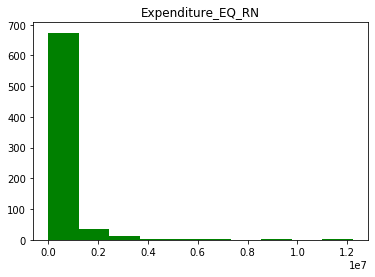

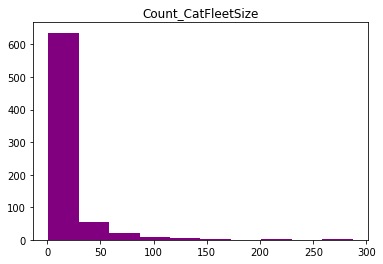

In [267]:
test = data_filtered
test = test.dropna()
X = test[['Count_CatFleetSize']]
Y = test[['Expenditure_EQ_RN']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

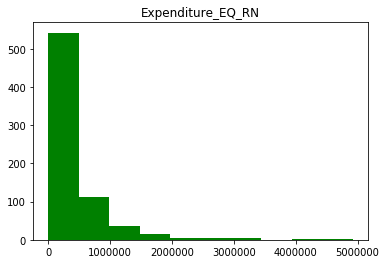

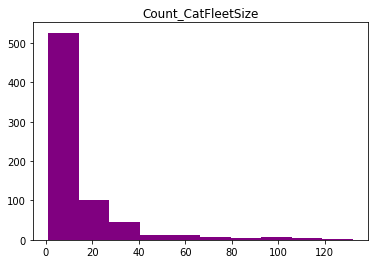

In [271]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize >= 150]) #Drop customers with over 150 machines
test = test.drop(test.index[test.Expenditure_EQ_RN >= 5000000]) #Drop customers with over 8M spent
test = test.dropna()
X = test[['Count_CatFleetSize']]
Y = test[['Expenditure_EQ_RN']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

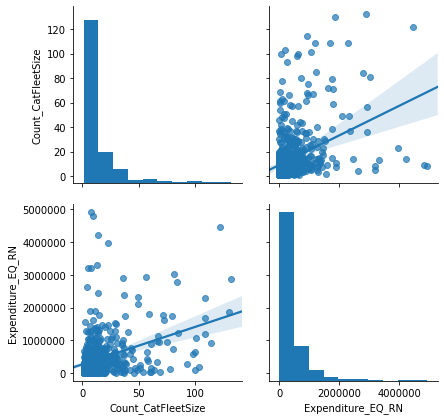

In [272]:
test = data_filtered
test = test.drop(test.index[test.Count_CatFleetSize >= 150]) #Drop customers with over 1M OLGA
test = test.drop(test.index[test.Expenditure_EQ_RN >= 5000000]) #Drop customers with over 500K Spending
test = test.dropna()
tpl = test[['Count_CatFleetSize','Expenditure_EQ_RN']]
#Scatter plot
sns.pairplot(tpl, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

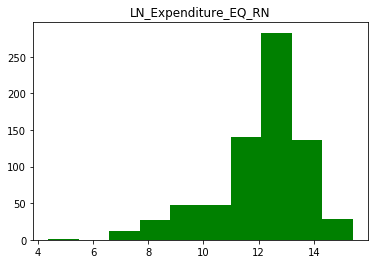

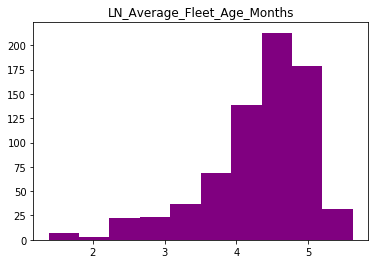

In [276]:
test = data_filtered
test = test.drop(test.index[test.Expenditure_EQ_RN >= 5000000]) #Drop customers with over 8M spent
test = test.dropna()
X = test[['LN_Average_Fleet_Age_Months']]
Y = test[['LN_Expenditure_EQ_RN']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

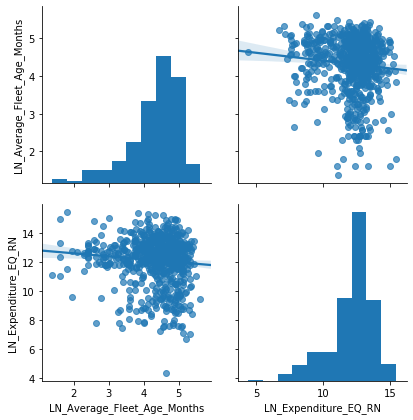

In [277]:
test = data_filtered
test = test.drop(test.index[test.Expenditure_EQ_RN >= 5000000])
test = test.dropna()
tpl = test[['LN_Average_Fleet_Age_Months','LN_Expenditure_EQ_RN']]
#Scatter plot
sns.pairplot(tpl, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

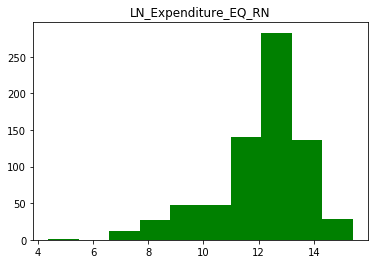

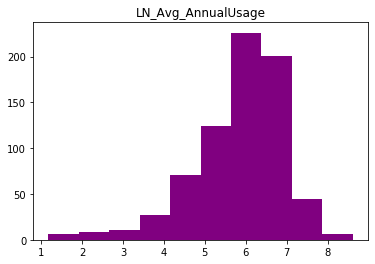

In [278]:
test = data_filtered
test = test.drop(test.index[test.Expenditure_EQ_RN >= 5000000]) #Drop customers with over 8M spent
test = test.dropna()
X = test[['LN_Avg_AnnualUsage']]
Y = test[['LN_Expenditure_EQ_RN']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

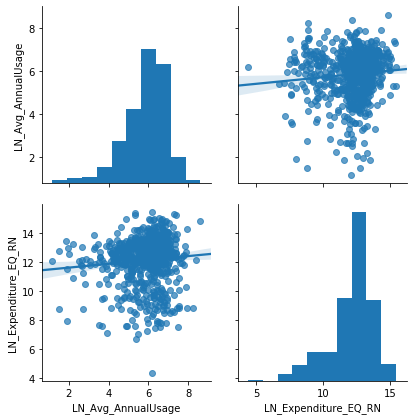

In [279]:
test = data_filtered
test = test.drop(test.index[test.Expenditure_EQ_RN >= 5000000])
test = test.dropna()
tpl = test[['LN_Avg_AnnualUsage','LN_Expenditure_EQ_RN']]
#Scatter plot
sns.pairplot(tpl, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

## Regression

### 4.5.1 OLS

In [290]:
data_filtered.columns

Index(['LN_Expenditure_EQ_RN', 'Count_CatFleetSize', 'LN_Count_CatFleetSize',
       'LN_Avg_AnnualUsage', 'LN_Average_Fleet_Age_Months'],
      dtype='object')

In [292]:
# define our input variable (X) & output variable
test = data_filtered.drop(['Count_CatFleetSize'],axis = 1)
test = test.dropna()
X = test.drop('LN_Expenditure_EQ_RN', axis = 1)
Y = test[['LN_Expenditure_EQ_RN']]

#OLS Model
model = sm.OLS(Y, X)

results = model.fit()
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     LN_Expenditure_EQ_RN   R-squared (uncentered):                   0.959
Model:                              OLS   Adj. R-squared (uncentered):              0.959
Method:                   Least Squares   F-statistic:                              7106.
Date:                  Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                          14:35:22   Log-Likelihood:                         -2112.9
No. Observations:                   919   AIC:                                      4232.
Df Residuals:                       916   BIC:                                      4246.
Df Model:                             3                                                  
Covariance Type:              nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

In [ ]:
# sns.pairplot(data_dropna, kind='reg', diag_kind='hist',
#              height=3, aspect=1,
#              plot_kws={'scatter_kws': {'alpha': 0.7}})
# #plt.savefig('..\\data\\Output\\1')

### 4.5.2 Train/Test Model

In [295]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# prediction model
y_predict = regression_model.predict(X_test)

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.61
MAE 1.32
RMSE 1.62


In [296]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.21


### 4.5.3 Test for Multicollinearity /  VIF Test

In [297]:
# define two data frames one before the drop and one after the drop
df_before = test
df_after = test.drop([], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                          118.2926
LN_Expenditure_EQ_RN             1.1980
LN_Count_CatFleetSize            1.5451
LN_Avg_AnnualUsage               1.0446
LN_Average_Fleet_Age_Months      1.4969
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                          118.2926
LN_Expenditure_EQ_RN             1.1980
LN_Count_CatFleetSize            1.5451
LN_Avg_AnnualUsage               1.0446
LN_Average_Fleet_Age_Months      1.4969
dtype: float64

### 4.5.4 Testing for Autocorrelation

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.6131
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


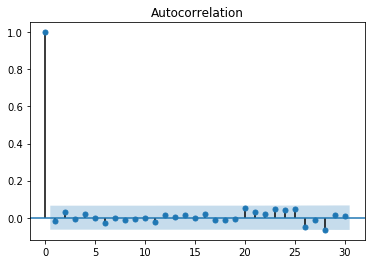

In [299]:
# define our input variable (X) & output variable
X = test.drop('LN_Expenditure_EQ_RN', axis = 1)
Y = test[['LN_Expenditure_EQ_RN']]

# test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

### 4.5.5 Testing the Mean of the Residuals Equals 0

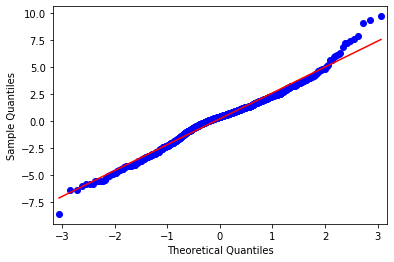

The mean of the residuals is 0.2236


In [300]:
# check for the normality of the residuals
sm.qqplot(results.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(results.resid)/ len(results.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### 4.5.6 Testing for Heteroskedasticity

In [301]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(results.resid, results.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")



7.584397283970425e-43 7.793052357308399e-47
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 7.584e-43
We reject the null hypthoesis, so there is heterosecdasticity.
